# Asunciones de Regresión Lineal

Las asunciones cuando queramos trabajar con un ANOVA:

- Los datos deben ser normales -> test de normalidad
- Las variables deben ser independientes -> correlación
- Homogeneidad de las varianzas o heterocedasticidad -> test de heterocedasticidad

In [1]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
import researchpy as rp
from scipy.stats import levene
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8) 

In [2]:
sales = pd.read_csv("../regresion_lineal/ficheros/sales2.csv",index_col =0)
sales.sample(2)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type,mes,año
2105,573,Missouri,Central,Small Market,46.0,96.0,171.0,77.0,59.0,29.0,...,80.0,100.0,180.0,2,2011-05-01,Coffee,Columbian,Regular,5,2011
1637,505,New Mexico,South,Small Market,19.0,52.0,97.0,39.0,39.0,12.0,...,30.0,40.0,70.0,6,2011-09-01,Espresso,Decaf Espresso,Decaf,9,2011


### Test de normalidad

Analíticamente: Test Shapiro para la variable respuesta *profit*:

In [3]:
stats.shapiro(sales['profit'])

ShapiroResult(statistic=0.9109621644020081, pvalue=1.8216880036222622e-44)

Visualmente: con qqplot 

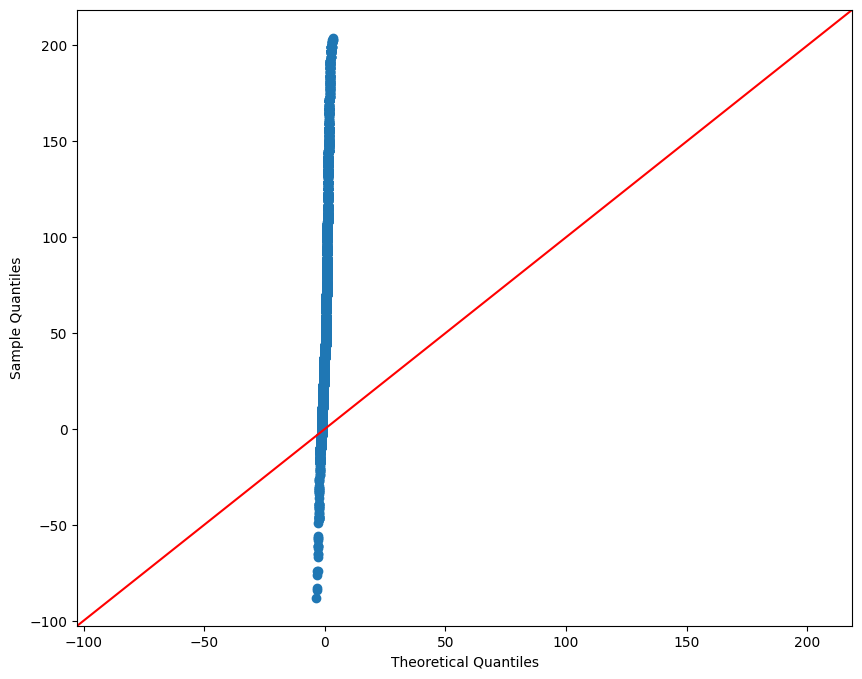

In [4]:
sm.qqplot(sales['profit'],line='45');

- Como podemos observar , nuestra variable respuesta no tiene una distribución normal, ya que su p-value es inferior a 0.05 y gráficamente los datos no se ajustan a la recta.

### Correlación

Realizamos unas pruebas de asunción de independencia para algunas de nuestras variables categóricas:

In [5]:
crosstab, test_results, expected = rp.crosstab(sales["product_type"], sales["product"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")




In [6]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 36.0) =,12744.0
1,p-value =,0.0
2,Cramer's V =,1.0


- Se observa que el p-value es 0, con lo cual podemos rechazar la H0 y son variables dependientes.

In [7]:
crosstab2, test_results2, expected2 = rp.crosstab(sales["state"], sales["product"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")



In [8]:
test_results2

,Chi-square test,results
0,Pearson Chi-square ( 228.0) =,2035.4665
1,p-value =,0.0000
2,Cramer's V =,0.1998


- Se observa que el p-value es 0, con lo cual podemos rechazar la H0 y son variables dependientes.

In [9]:
crosstab3, test_results3, expected3 = rp.crosstab(sales["state"], sales["market_size"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [10]:
test_results3

,Chi-square test,results
0,Pearson Chi-square ( 19.0) =,4248.0
1,p-value =,0.0
2,Cramer's V =,1.0


- Se observa que el p-value es 0, con lo cual podemos rechazar la H0 y son variables dependientes.

In [11]:
crosstab4, test_results4, expected4 = rp.crosstab(sales["market_size"], sales["type"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [12]:
test_results4

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.0293
1,p-value =,0.8640
2,Cramer's phi =,0.0026


- Se observa que el p-value es mayor que 0.05, con lo cual aceptamos la H0 y determinamos que son variables independientes.

### Test de heterocedasticidad

In [13]:
sales.head(2)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type,mes,año
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular,4,2010
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular,7,2010


Analíticamente: Test de Levene

In [14]:
sales['market_size'].unique()

array(['Small Market', 'Major Market'], dtype=object)

In [15]:
pequeño = sales[sales['market_size']=='Small Market']['profit']
grande = sales[sales['market_size']=='Major Market']['profit']

In [16]:
levene = stats.levene(pequeño,grande,center = 'median')
levene

LeveneResult(statistic=133.12518200568914, pvalue=2.3957370353372936e-30)

- Este p-value es menor de 0.05 por lo que los datos son heterocidásticos. Tienen distinta varianza. Rechazamos la H0.

In [17]:
sales['type'].unique()

array(['Regular', 'Decaf'], dtype=object)

In [18]:
normal = sales[sales['type']=='Regular']['profit']
descafeinado = sales[sales['type']=='Decaf']['profit']

In [19]:
levene2 =stats.levene(normal,descafeinado,center = 'median')
levene2

LeveneResult(statistic=0.04799658825481825, pvalue=0.8265972967508308)

- Nos devuelve como p-valor un valor mayor que 0.05, lo que nos indica que los datos son homocedásticos, por lo que deducimos que tienen una varianza similar.


Gráficamente: realizamos un violinplot

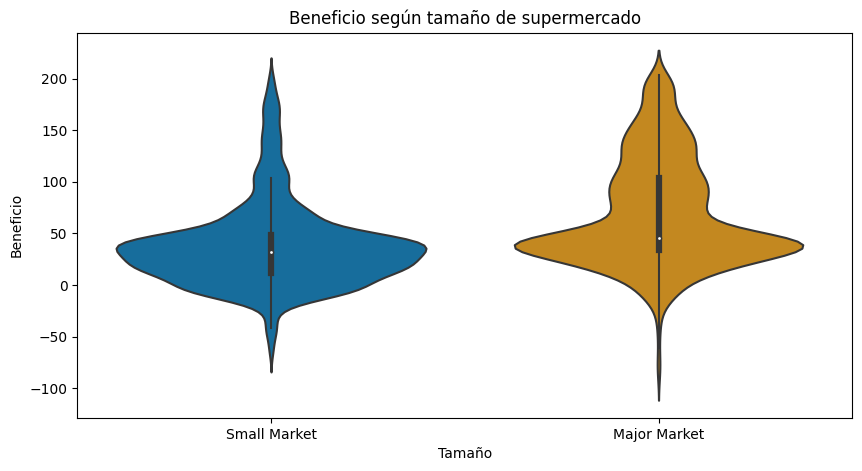

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))


sns.violinplot(
    x       = 'market_size',
    y       = 'profit',
    data    = sales,
    palette = 'colorblind',
    ax      = ax
)
ax.set_title('Beneficio según tamaño de supermercado')
ax.set_ylabel('Beneficio')
ax.set_xlabel('Tamaño');


Visualmente: vemos que la mediana está a la misma altura. La dispersión es similar.

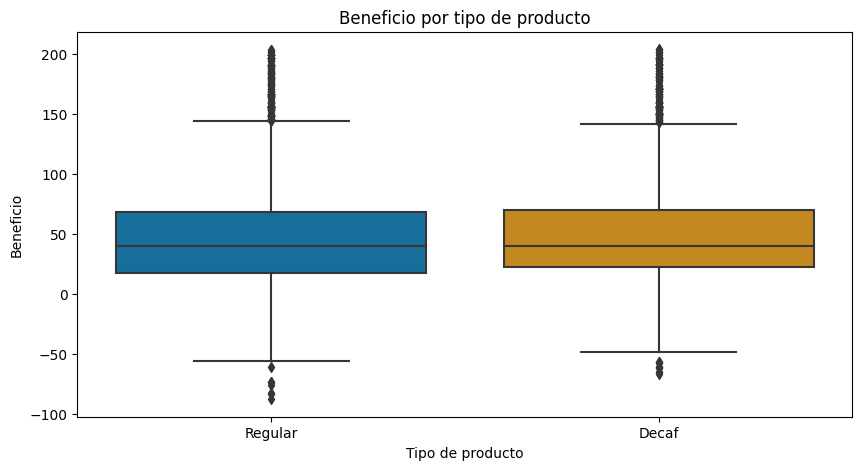

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))


sns.boxplot(
    x       = 'type',
    y       = 'profit',
    data    = sales,
    palette = 'colorblind',
    ax      = ax
)
ax.set_title('Beneficio por tipo de producto')
ax.set_ylabel('Beneficio')
ax.set_xlabel('Tipo de producto');


- La mediana está a la misma altura y la dispersión es similar. Los datos de ambas categorías devuelven resultado parecidos.

**NOTA**: hemos podido comprobar que nuestros datos no cumplen las asunciones y por lo tanto, un modelo de regresión lineal no sería el adecuado para entrenar nuestro modelo. No obstante, como estamos aprendiendo, *fingimos* que sí que cumplen las asunciones y seguimos con el análisis. Igualmente, en el jupyter V intentamos normalizar la variable respuesta.